<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<div align=center>
			<font face="IranNastaliq" size=30>
				<p></p>
				<p></p>
به نام خدا
				<p></p>
			</font>
        </div>
        <font color=#FF7500 size=6>
Kernel Density Estimate (KDE)
        </font><br>
        در آمار و احتمال، برآورد چگالی (به انگلیسی: Density estimation) به فرایند تخمین تابع چگالی احتمال یک متغیر تصادفی با استفاده از نمونه‌های مشاهده‌شده از آن متغیر گفته‌می‌شود. معمولاً فرض می‌شود نمونه‌های مشاهده شده به طور تصادفی و مستقل براساس تابع توزیع احتمال، توزیع شده‌اند. 
    <br>      
        برآورد چگالی کرنل (KDE) یک روش غیر پارامتری برای تخمین تابع چگالی احتمال (PDF) یک متغیر تصادفی است.
    این یک مسئله اساسی برای هموارسازی داده ها است که در آن استنباط هایی بر اساس یک نمونه داده محدود، درباره کل جمعیت انجام می شود.
        یکی از کاربردهای مشهور برآورد چگالی هسته در برآورد چگالی حاشیه ای داده های شرطی هنگام استفاده از طبقه بندی کننده ساده بیز (naive Bayes) است که می تواند دقت پیش بینی آن را بهبود بخشد.
        <br>
        اگر (x1 ، x2 ،… ، xn) نمونه های مستقل و یکسان توزیع شده از توزیع تک متغیره با چگالی ناشناخته در هر نقطه x باشند. ما میخواهیم که شکل این تابع را تخمین بزنیم. که بصورت زیر داریم:
    </font>
</div>
    <img src="figs/f3b09505158fb06033aabf9b0116c8c07a68bf31.svg" style="float:center; width:50%"/>
    
<div style="direction:rtl;line-height:300%;">
    <font face="XB Zar" size=5><br>     
         که K همان کرنل است -یک تابع غیر منفی- و h> 0 یک پارامتر هموار کننده است که پهنای باند نامیده می شود. Kh کرنل مقیاس شده نامیده می شود و به شکل Kh (x) = 1/h K (x/h) تعریف می شود. به طور شهودی، می خواهیم h را به اندازه ای که داده ها اجازه می دهند کوچک انتخاب کنیم. تابع کرنل میتواند حاصل توزیع های احتمالاتی مختلفی باشد لکن اغلب از توزیع نرمال استاندارد استفاده میشود.
     <br><br>
        به عبارت دیگر برای هر یک از مقادیر موجود در میان داده ها میتواند تابع تورزیع نرمال استاندارد اختصاص داد و با محاسبه k(x) برای همه xi های موجود در داده ها و محاسبه مجموع f(x) بدست خواهد آمد که تخمینی از تابع چگالی احتمال متغییر تصادفی مربوطه می باشد.
    </font>
    <img src="figs/Comparison_of_1D_histogram_and_KDE.png" style="float:center; width:50%"/>
    
</div>


In [28]:
from math import exp, sqrt, pi
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def norm_std(x):
    power = -((x**2)/2)
    phi = exp(power)/sqrt(2*pi)
    return phi

norm_std(0.5)

0.3520653267642995

In [72]:
def KDE(x_arr, x, h):
    n = len(x_arr)
    sumation = 0
    for x_i in x_arr:
        inlet = (x-x_i)/h
        K = norm_std(inlet)
        sumation += K
    sumation = (1/(n*h))*sumation
    return sumation

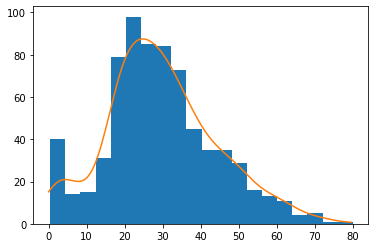

In [90]:
titanic = pd.read_csv('data/titanic.csv')
# titanic['Age'].dropna(inplace = False)
Age = titanic['Age'].dropna(inplace = False).tolist()
Age = np.array(Age)
# Age1[Age1!=None]
px = plt.hist(Age, bins=20)
f_x = []
xs = np.array(np.arange(0,80,0.5))
# xs.shape
for x in xs:
    fx = KDE(Age, x, 4)
    f_x.append(fx)


# xs
# len(f_x)
# print(f_x)
# Age.shape
# np.array(px)
# px[1:10]
# px[0]
# px[1]
# plt.hold(True)
plt.plot(xs, f_x)
plt.show()